# Problema 1

Sea $f(x) = x e^x$. Aproxime $f^\prime (2)$ mediante la *fórmula centrada de tres puntos*
$$
f^\prime(x) = \frac{f(x+h) - f(x-h)}{2h} + \mathcal{O}(h^2)
$$
para distintos valores de $h$ y calcule el incremento óptimo $h_o$ teniendo en cuenta los errores de truncamiento y redondeo. 
Usando la diferencia entre $f'(2)$ (calculado en Julia usando las funciones matemáticas incorporadas) y el valor de la aproximación mencionada, grafique en escala *log-log* el error versus $h$ para $h = 10^{-k}$ con $k$ entero.

In [1]:
function dif_3_medio(f::Function,
    h::Float64,
    x::Float64
    )
    df = (f(x+h)-f(x-h))/2h
    return df
end

dif_3_medio (generic function with 1 method)

In [2]:
f(x) = x*exp(x)
df_2(h)=dif_3_medio(f,h,2.0)

df_2 (generic function with 1 method)

In [3]:
df(x)=(x+1)*exp(x)
valf2 = df(2)
g64(h)=df_2(h)- valf2

g64 (generic function with 1 method)

In [4]:
# Funcion en 32
g32(h)=(Float32(f(2.0+h))-Float32(f(2.0-h)))/Float32(2h) - Float32(valf2)
# Funcion en bigFloat
gBF(h)=(BigFloat(f(2.0+h))-BigFloat(f(2.0-h)))/BigFloat(2h) - BigFloat(valf2)


gBF (generic function with 1 method)

In [5]:
n = 20
h = [10.0^(-i) for i in 1:n] ;

In [6]:
using Plots

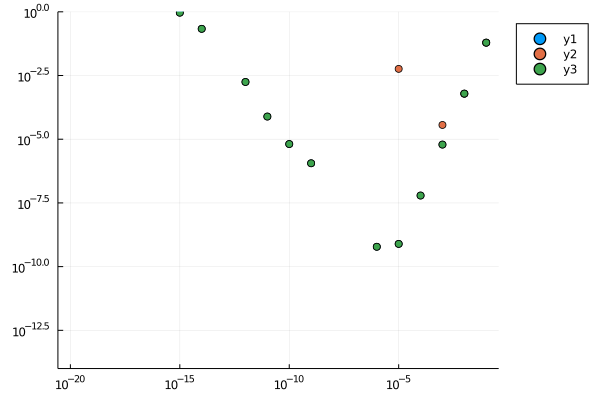

In [7]:
scatter(h,g64.(h), legend=:outertopright, lw=3,
xaxis=:log,
yaxis=:log,
ylims = (10e-15, 0)
)
scatter!(h,g32.(h))
scatter!(h,gBF.(h), lw=1)

# Problema 2

Para funciones $f(x)$ que son suficientemente diferenciables en $x=c$

1. Muestre que se  puede aproximar $f'(c)$ con la *fórmula centrada de 5 puntos*
$$
f'(c)\,=\,\frac{1}{12 h} \left(f(c-2 h)-8 f(c-h)+8 f(c+h)-f(c+2 h)
\right)\,+\,O(h^4)
$$
2. Muestre que la aproximación es exacta para polinomios de grado $\le 4$.

Para armar la fórmula de 5 puntos vamos a aproximar a la función f(x) por el polinomio interpolante de lagrange. Para eso necesitamos los Li de 5 puntos. 
$$
L_0 = \frac{(x-x_1)(x-x_2)(x-x_3)(x-x_4)}{(x_0-x_1)(x_0-x_2)(x_0-x_3)(x_0-x_4)} \\
L_1 = \frac{(x-x_1)(x-x_2)(x-x_3)(x-x_4)}{(x_1-x_0)(x_1-x_2)(x_1-x_3)(x_1-x_4)} \\
L_2 = \frac{(x-x_1)(x-x_2)(x-x_3)(x-x_4)}{(x_2-x_1)(x_2-x_0)(x_2-x_3)(x_2-x_4)} \\
L_3 = \frac{(x-x_1)(x-x_2)(x-x_3)(x-x_4)}{(x_3-x_1)(x_3-x_2)(x_3-x_0)(x_3-x_4)} \\
L_4 = \frac{(x-x_1)(x-x_2)(x-x_3)(x-x_4)}{(x_4-x_1)(x_4-x_2)(x_4-x_3)(x_4-x_0)}
$$
Cuyas derivadas son:
$$
L_0'= \frac{(x-x_1)(x-x_2)(x-x_3)+(x-x_1)(x-x_4)(x-x_3)+(x-x_2)(x-x_4)(x-x_3)+(x-x_1)(x-x_2)(x-x_4)}{(x_0-x_1)(x_0-x_2)(x_0-x_3)(x_0-x_4)} \\
L_1'= \frac{(x-x_1)(x-x_2)(x-x_3)+(x-x_1)(x-x_4)(x-x_3)+(x-x_2)(x-x_4)(x-x_3)+(x-x_1)(x-x_2)(x-x_4)}{(x_1-x_0)(x_1-x_2)(x_1-x_3)(x_1-x_4)} \\
L_2'= \frac{(x-x_1)(x-x_2)(x-x_3)+(x-x_1)(x-x_4)(x-x_3)+(x-x_2)(x-x_4)(x-x_3)+(x-x_1)(x-x_2)(x-x_4)}{(x_2-x_1)(x_2-x_0)(x_2-x_3)(x_2-x_4)} \\
L_3'= \frac{(x-x_1)(x-x_2)(x-x_3)+(x-x_1)(x-x_4)(x-x_3)+(x-x_2)(x-x_4)(x-x_3)+(x-x_1)(x-x_2)(x-x_4)}{(x_3-x_1)(x_3-x_2)(x_3-x_0)(x_3-x_4)} \\
L_4'= \frac{(x-x_1)(x-x_2)(x-x_3)+(x-x_1)(x-x_4)(x-x_3)+(x-x_2)(x-x_4)(x-x_3)+(x-x_1)(x-x_2)(x-x_4)}{(x_4-x_1)(x_4-x_2)(x_4-x_3)(x_4-x_0)} \\
$$
Ahora utilizando la expresión de f(x) en función de polinomios interpolantes de legendre y el teorema del error, cuando derivamos tenemos que cada término es el poducto del valor de la derivada en el punto con el polinomio de legendre del punto y por otro lado tenemos el error. Es decir:
$$
f'(x) = f(x_0)L_0'(x)+f(x_1)L_1'(x)+f(x_2)L_2'(x)+f(x_3)L_3'(x)+f(x_4)L_4'(x)+\,O(h^4)
$$
En realidad el error no tiene todavia esa forma, pero como vamos a valuar en puntos equidistantes va a terminar teniendo esa expresion.
Pero ahora queremos tener la derivada en c, entonces tomamos que los puntos son equidistantes, es decir:
$$
x_0 = c-2h \\
x_1 = c-h \\
x_2 = c \\
x_3 = c+h \\
x_4 = c+2h \\
$$
Ahora tenemos que ver como quedan todos los $L_i'(x)$ con los nuevos valores de $x$:
El numerador va a ser siempre:
$$
(x-c+h)(x-c)(x-c-h)+(x-c-h)(x-c-2h)(x-c-h)+(x-c)(x-c-2h)(x-c-h)+(x-c-h)(x-c)(x-c-2h)
$$
Que si ahora lo valuamos en $c$, que es donde queremos conocer la derivada:
$$(-h)(-2h)(-h) = -2h^3$$
Ahora tenemos que ver cada denominador reemplazando los $x_i$:
$$
L_0':\\
= (c-2h-c+h)(c-2h-c)(c-2h-c-h)(c-2h-c-2h)\\
= (-h)(-2h)(-h)(-4h)\\
= 8h^4\\
L_1':\\
= (h)(-h)(-2h)(-3h) \\
= -6h^4 \\
L_2':\\
= (h)(2h)(-h)(-2h) \\
= 4h^4 \\
L_3':\\
= (2h)(h)(3h)(-h) \\
= -6h^4 \\
L_4':\\
= (3h)(2h)(h)(4h)\\
= 24h^4 \\
$$

TERMINAR

# Problema 3

1. Implemente el cálculo aproximado de las derivadas de $f(x)=\cos x$ y $g(x)=e^x$ en $x=0.1, 1, 100$ utilizando las fórmulas *i) hacia adelante de 2 puntos*, *ii) centrada de 3 puntos* y *iii) centrada de 5 puntos*.

2. Haga un gráfico *log-log* del error relativo $E$ vs $h$ para $h\in [\epsilon_m(x),0.1]$ (donde $\epsilon_m(x)$ es la precisión de la máquina al valor $x$).

3. Verifique si el número de cifras decimales que obtiene coincide con las estimaciones presentadas en el téorico.

4. Identifique las regiones donde domina el error del algoritmo y el error de redondeo, respectivamente. Las pendientes que se observan, corresponden a las predichas en el teórico?

In [8]:
# Defino las funciones para calcular las derivadas:
function dif_5_medio(f::Function,
    h::Float64,
    x::Float64
    )
    df = (f(x-2h)-8f(x-h)+8f(x+h)-f(x+2h))/12h
    return df
end

dif_5_medio (generic function with 1 method)

In [9]:
function dif_2_adelante(f::Function,
    h::Float64,
    x::Float64
    )
    df = (f(x+h)-f(x))/h
    return df
end

dif_2_adelante (generic function with 1 method)

In [10]:
f(x) = cos(x)
df(x) = -sin(x)
g(x) = exp(x)
# Valores de f'(x) por los metodos
println("Metodos: ",dif_5_medio(f,0.1,0.1),"   ",dif_5_medio(f,0.1,1.0),"    ",dif_5_medio(f,0.1,100.0))
# valores de f'(x) teoricos calculados
println("Teorico: ",df(0.1),"   ",df(1),"   ",df(100))
# Valores de g'(x) por los metodos
println("Metodos: ",dif_5_medio(g,0.1,0.1),"    ",dif_5_medio(g,0.1,1.0),"    ",dif_5_medio(g,0.1,100.0))
# valores de f'(x) teoricos calculados
println("Teorico: ",g(0.1),"   ",g(1),"   ",g(100))

Metodos: -0.09983308426470604   -0.841468183241837    0.5063639552324632
Teorico: -0.09983341664682815   -0.8414709848078965   0.5063656411097588
Metodos: 1.105167229784429    2.71827275672649    2.6881081707520874e43
Teorico: 1.1051709180756477   2.718281828459045   2.6881171418161356e43


Para metodo diferencia de 2 hacia adelante el error absoluto se acota por $\frac{|h|M_2}{2}$, con $M_2$ cota de la derivada segunda.
Para metodo diferencia de 3 centrada el error absoluto se acota por $\frac{h^2M_3}{6}$, con $M_3$ cota de la derivada tercera.
Para metodo diferencia de 5 centrada el error absoluto se acota por $\frac{h^4M_5}{30}$, con $M_5$ cota de la derivada quinta.

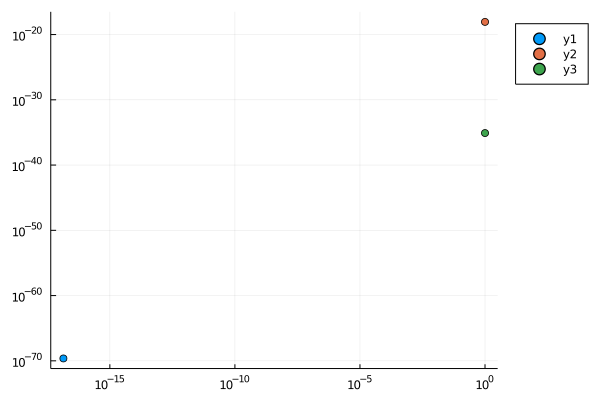

In [41]:
# para x=0.1,
x1 = 0.1
# Cotas para cada método:
M2 = 1
M3 = 1
M5 = 1
f(x) = cos(x)
ER_d5m_f(h)= (h^4)*M5/(30.0*abs(dif_5_medio(f,h,x1)))
ER_d2adelante_f(h)=abs(h)*M2/(2.0*abs(dif_2_adelante(f,h,x1)))
ER_d3m_f(h)=(h^2)*M3/(6.0*abs(dif_3_medio(f,h,x1)))
values = [h for h in eps(x1):0.1:x1]
scatter(values, ER_d5m_f.(values),
    legend=:outertopright,
    axis=:log,
    yaxis=:log,
)
scatter!(ER_d2adelante_f.(values))
scatter!(ER_d3m_f.(values))

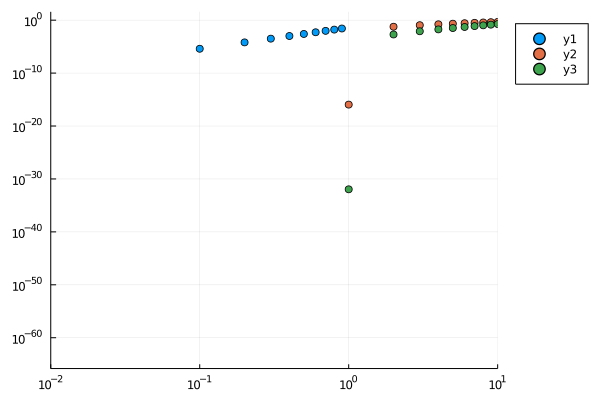

In [36]:
# para x=1,
x1 = 1.0
# Cotas para cada método:
M2 = 1
M3 = 1
M5 = 1
f(x) = cos(x)
ER_d5m_f(h)= (h^4)*M5/(30.0*abs(dif_5_medio(f,h,x1)))
ER_d2adelante_f(h)=abs(h)*M2/(2.0*abs(dif_2_adelante(f,h,x1)))
ER_d3m_f(h)=(h^2)*M3/(6.0*abs(dif_3_medio(f,h,x1)))
values = [h for h in eps(x1):0.1:x1]
scatter(values, ER_d5m_f.(values),
    legend=:outertopright,
    axis=:log,
    yaxis=:log,
    xlims=(10^(-2),:auto)
)
scatter!(ER_d2adelante_f.(values))
scatter!(ER_d3m_f.(values))

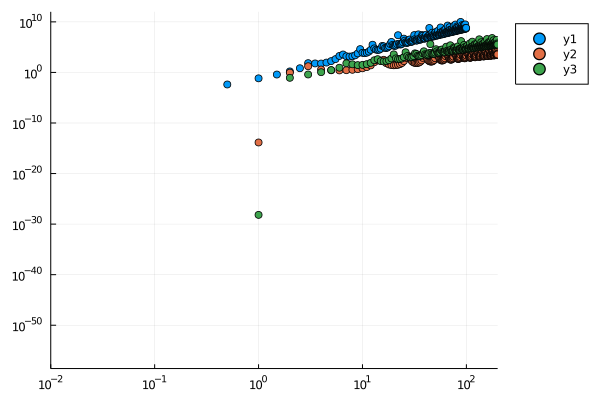

In [58]:
# para x=100,
x1 = 100.0
# Cotas para cada método:
M2 = 1
M3 = 1
M5 = 1
f(x) = cos(x)
ER_d5m_f(h)= (h^4)*M5/(30.0*abs(dif_5_medio(f,h,x1)))
ER_d2adelante_f(h)=abs(h)*M2/(2.0*abs(dif_2_adelante(f,h,x1)))
ER_d3m_f(h)=(h^2)*M3/(6.0*abs(dif_3_medio(f,h,x1)))
values = [h for h in eps(x1):0.5:x1]
scatter(values, ER_d5m_f.(values),
    legend=:outertopright,
    axis=:log,
    yaxis=:log,
    xlims=(10^(-2),:auto)
)
scatter!(ER_d2adelante_f.(values))
scatter!(ER_d3m_f.(values))

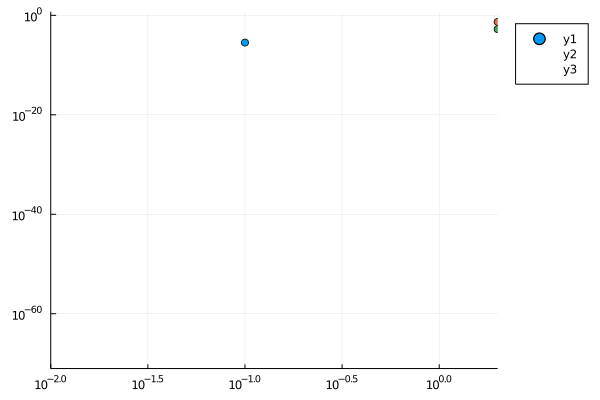

In [49]:
#ahora para la funcion exponencial que es su propia derivada
g(x) = exp(x)
# para x=0.1,
x1 = 0.10001
# Cotas para cada método, como exp es creciente, el maximo esta siempre en el extremo derecho del intervalo:
M2 = exp(x1)
M3 = exp(x1)
M5 = exp(x1)
g(x) = exp(x)
ER_d5m_g(h)= (h^4)*M5/(30.0*abs(dif_5_medio(g,h,x1)))
ER_d2adelante_g(h)=abs(h)*M2/(2.0*abs(dif_2_adelante(g,h,x1)))
ER_d3m_g(h)=(h^2)*M3/(6.0*abs(dif_3_medio(g,h,x1)))
values = [h for h in eps(x1):0.1:x1]
scatter(values, ER_d5m_g.(values),
    legend=:outertopright,
    axis=:log,
    yaxis=:log,
    xlims=(10^(-2),:auto)
)
scatter!(ER_d2adelante_g.(values))
scatter!(ER_d3m_g.(values))
#Para el 0.1  no funciona, por algun problema en la definicion de values.

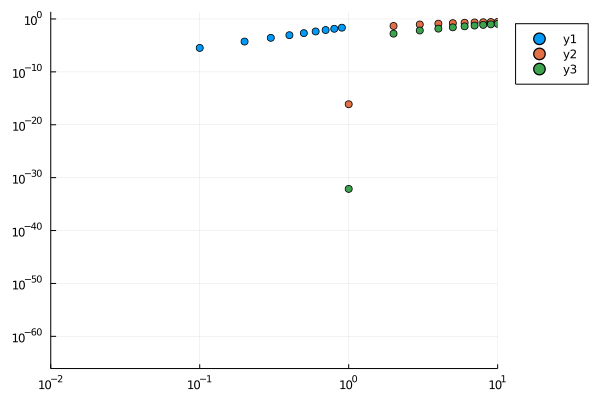

In [50]:
# para x=1,
x1 = 1.0
# Cotas para cada método, como exp es creciente, el maximo esta siempre en el extremo derecho del intervalo:
M2 = exp(x1)
M3 = exp(x1)
M5 = exp(x1)
g(x) = exp(x)
ER_d5m_g(h)= (h^4)*M5/(30.0*abs(dif_5_medio(g,h,x1)))
ER_d2adelante_g(h)=abs(h)*M2/(2.0*abs(dif_2_adelante(g,h,x1)))
ER_d3m_g(h)=(h^2)*M3/(6.0*abs(dif_3_medio(g,h,x1)))
values = [h for h in eps(x1):0.1:x1]
scatter(values, ER_d5m_g.(values),
    legend=:outertopright,
    axis=:log,
    yaxis=:log,
    xlims=(10^(-2),:auto)
)
scatter!(ER_d2adelante_g.(values))
scatter!(ER_d3m_g.(values))

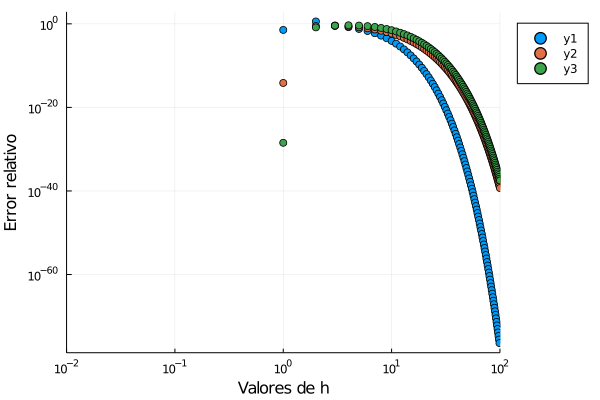

In [56]:
# para x=100,
x1 = 100.0
# Cotas para cada método, como exp es creciente, el maximo esta siempre en el extremo derecho del intervalo:
M2 = exp(x1)
M3 = exp(x1)
M5 = exp(x1)
g(x) = exp(x)
ER_d5m_g(h)= (h^4)*M5/(30.0*abs(dif_5_medio(g,h,x1)))
ER_d2adelante_g(h)=abs(h)*M2/(2.0*abs(dif_2_adelante(g,h,x1)))
ER_d3m_g(h)=(h^2)*M3/(6.0*abs(dif_3_medio(g,h,x1)))
values = [h for h in eps(x1):1:x1]
scatter(values, ER_d5m_g.(values),
    legend=:outertopright,
    axis=:log,
    yaxis=:log,
    xlims=(10^(-2),:auto),
    xlabel="Valores de h",
    ylabel="Error relativo"
)
scatter!(ER_d2adelante_g.(values))
scatter!(ER_d3m_g.(values))

# Problema 4

En el archivo `pos.dat` que se encuentra en el repositorio se dispone de un conjunto de datos experimentales de la posición de un móvil que se desplaza en línea recta. El mismo tiene dos columnas, siendo la primera el tiempo de la medición, $t_i$ y la segunda la posición, $x(t_i)$.

1. Escriba un programa que lea los datos del archivo y calcule la velocidad del móvil para los mismos tiempos, $t_i$. Utilice la fórmula de 3 puntos. Preste especial atención a los puntos de los bordes del intervalo.
2. Repita el punto 1. utilizando las fórmulas de 5 puntos.

In [74]:
# Primero debemo abrir el archivo y separar los datos
tiempo = Vector{Float64}()
posicion = Vector{Float64}()
open("/home/andresmateo/Documentos/Facu/Metodos Numericos/Jupyter profes/MetodosNumericos2021/Guias/pos.dat") do datos
    for linea = eachline(datos)
        fila= split(linea)
        t = parse(Float64,fila[1])
        x_t = parse(Float64,fila[2])
        push!(tiempo,t)
        push!(posicion,x_t)
    end
end
#for i in 1:length(tiempo)
#    println(tiempo[i],"      ",posicion[i])
#end

In [83]:
# Voy a suponer que hay que utilizar los h optimos vistos, es decir h = 10e-5
h = 10^(-5)
# Calculo las derivadas con la fórmula de 3 puntos centrada para todas los valores interiores, sin contar extremos

derivada = Vector{Float64}(undef,length(tiempo))
deriv = 1
for i ∈ 2:(length(tiempo)-1)
    deriv = (posicion[i+1]-posicion[i-1])/(tiempo[i+1]-tiempo[i-1])
    derivada[i] = deriv
end
#print(derivada)
#ahora faltan ver los extremos, pero para eso utilizamos las formulas extremos:
# a izquierda 
derivada[1] = (-3*posicion[1]+4*posicion[2]-posicion[3])/(tiempo[3]-tiempo[1])
# a derecha
derivada[length(tiempo)] = (3*posicion[length(tiempo)]-4*posicion[length(tiempo)-1]+posicion[length(tiempo)-2])/(tiempo[length(tiempo)]-tiempo[length(tiempo)-2])
#print(derivada)

2.513807436715483

In [84]:
using Plots

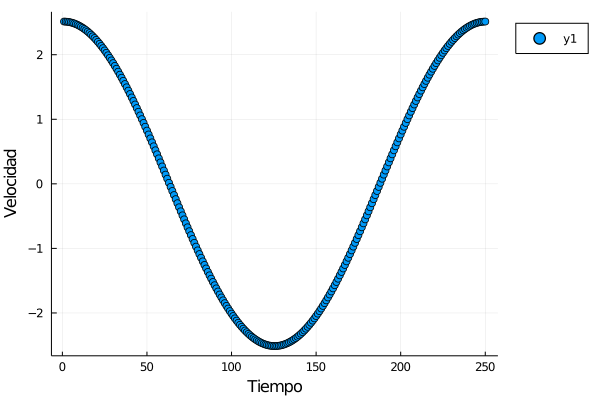

In [88]:
scatter(derivada,
    legend=:outertopright,
    xlabel="Tiempo",
    ylabel="Velocidad")

# Ejercicios Complementarios

## Problema C.1

**Derivada segunda:** Deduzca la fórmula centrada equiespaciada de tres puntos para la derivada segunda $f''(x_0)$. Incluya una cota para el error absoluto.

## Problema C.2

**Interpolación y diferenciación:** Se conoce el valor de $f(x)$ en tres puntos $x_0,x_1,x_2$. Escriba el polinomio interpolante $P_2(x)$ en la forma de Lagrange. Asuma que aproximamos $f'(x_i)$ por $P_2'(x_i)$,

1. Muestre que si tomamos $x_0=c-h,\,x_1=c,\,x_2=c+h$ obtenemos la expresión del algoritmo centrado de tres
puntos para $f'(c)$. 
2. Muestre que, en general, esta proximación arroja el algoritmo de tres puntos. Reobtenga la fórmula dada en el teórico para $x_0=c-h_1,\,x_1=c,\,x_2=c+h_2$. Obtenga una expresión para las derivadas en extremos del intervalo $[a,b]$, $f'(a)$ con $x_0=a,\,x_1=a+h,\,x_2=a+2 h$ y $f'(b)$ con $x_0=b,\,x_1=b-h,\,x_2=b-2h$.
3. Generalice a 5 puntos y re-obtenga el algoritmo centrado y equiespaciado en este caso.